# Proyecto Final - Marco Antonio Rimola De Leon
Econometria 2
Trimestre 2 - 2023
Marco Rimola - IDE09111187

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

In [2]:
# SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
# OverallQual: Overall material and finish quality, rates the overall material and finish of the house
#       10	Very Excellent
#       9	Excellent
#       8	Very Good
#       7	Good
#       6	Above Average
#       5	Average
#       4	Below Average
#       3	Fair
#       2	Poor
#       1	Very Poor
#         
#1stFlrSF: First Floor square feet
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
#YearBuilt: Original construction date
#LotFrontage: Linear feet of street connected to property

data_proyecto = np.load('proyecto_training_data.npy')

In [3]:
nombres_columnas = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df = pd.DataFrame(data_proyecto, columns=nombres_columnas)

In [4]:
df

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [6]:
df.shape

(1460, 6)

### Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80%) y validacion y pruebas(20%).

In [10]:
filas_totales = df.shape[0]
slicing = int(0.8 * filas_totales)
data_entrenamiento, data_prueba = np.split(df, [slicing])
print("Data de Entrenamiento:", data_entrenamiento.shape)
print("Data de Prueba:", data_prueba.shape)

Data de Entrenamiento: (1168, 6)
Data de Prueba: (292, 6)


### Analisis exploratorio de datos

In [18]:
media = data_entrenamiento.mean()
valores_max = data_entrenamiento.max()
valores_min = data_entrenamiento.min()
rangos = data_entrenamiento.max() - data_entrenamiento.min()
std_dev = data_entrenamiento.std()
for column in data_entrenamiento.columns:
    print("Column:", column)
    print("Media:", media[column])
    print("Max:", valores_max[column])
    print("Min:", valores_min[column])
    print("Rangos:", rangos[column])
    print("Desviacion Estandar:", std_dev[column])
    print()


Column: SalePrice
Media: 180590.27739726027
Max: 755000.0
Min: 34900.0
Rangos: 720100.0
Desviacion Estandar: 78815.69790179149

Column: OverallQual
Media: 6.101027397260274
Max: 10.0
Min: 1.0
Rangos: 9.0
Desviacion Estandar: 1.3780252276191631

Column: 1stFlrSF
Media: 1156.3236301369864
Max: 3228.0
Min: 334.0
Rangos: 2894.0
Desviacion Estandar: 373.7803744886528

Column: TotRmsAbvGrd
Media: 6.4854452054794525
Max: 14.0
Min: 2.0
Rangos: 12.0
Desviacion Estandar: 1.6091407087243883

Column: YearBuilt
Media: 1971.451198630137
Max: 2010.0
Min: 1875.0
Rangos: 135.0
Desviacion Estandar: 29.95170660645528

Column: LotFrontage
Media: 69.94698544698545
Max: 313.0
Min: 21.0
Rangos: 292.0
Desviacion Estandar: 23.478160779049645



### Para cada variable en el dataset usar seaborn para graficar un histograma de la variable

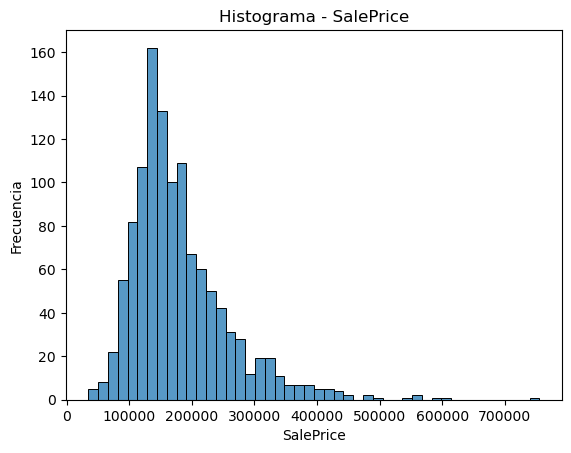

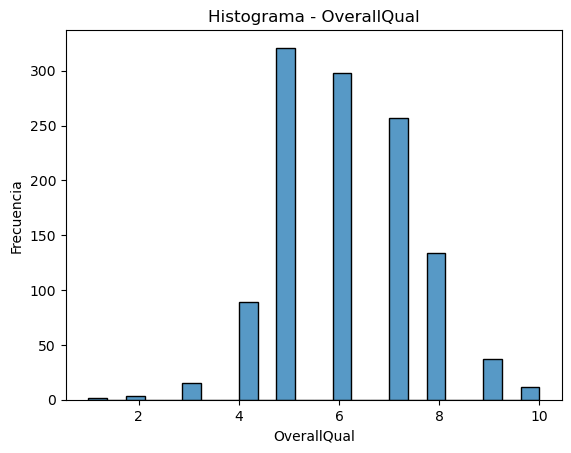

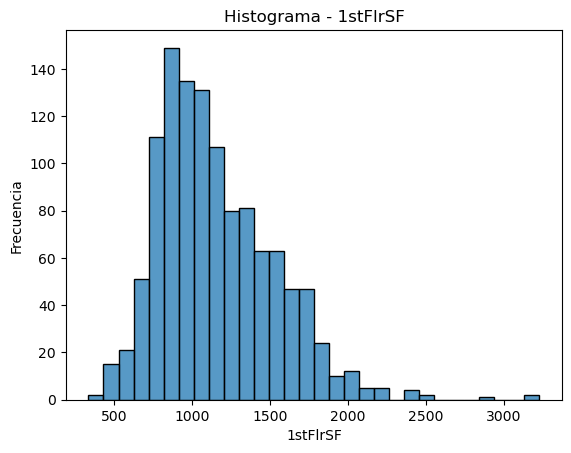

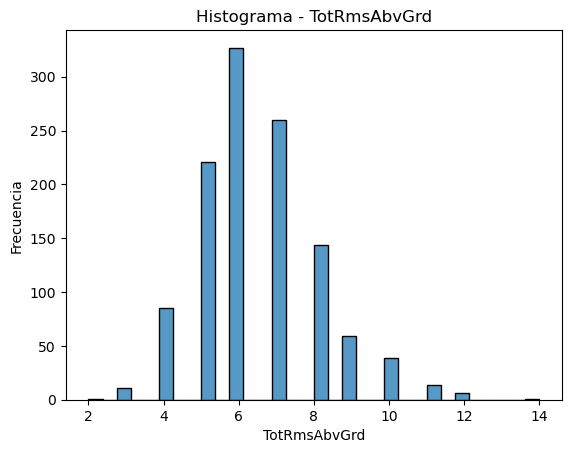

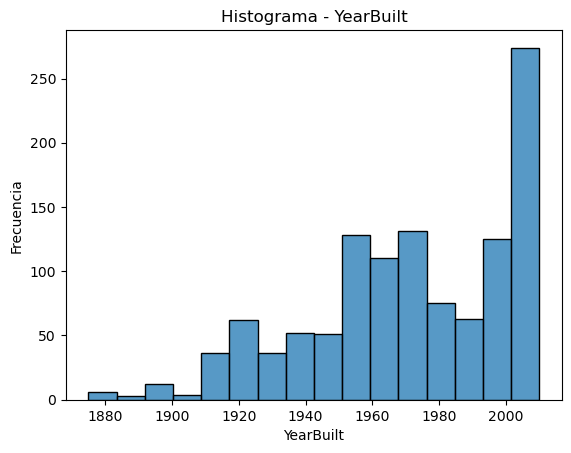

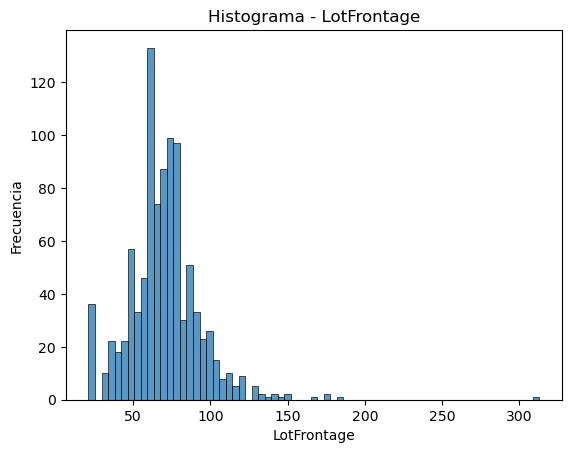

In [19]:
for column in data_entrenamiento.columns:
    sns.histplot(data=data_entrenamiento[column])
    plt.title(f"Histograma - {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()

In [20]:
coeficiente_correl = data_entrenamiento.corr()['SalePrice']
print(coeficiente_correl)

SalePrice       1.000000
OverallQual     0.793990
1stFlrSF        0.616289
TotRmsAbvGrd    0.564707
YearBuilt       0.534171
LotFrontage     0.363292
Name: SalePrice, dtype: float64


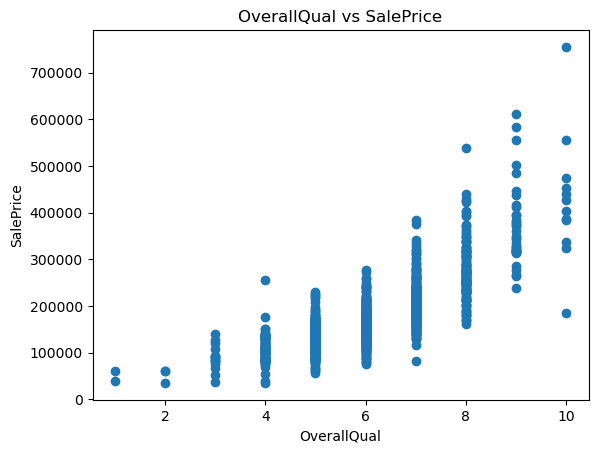

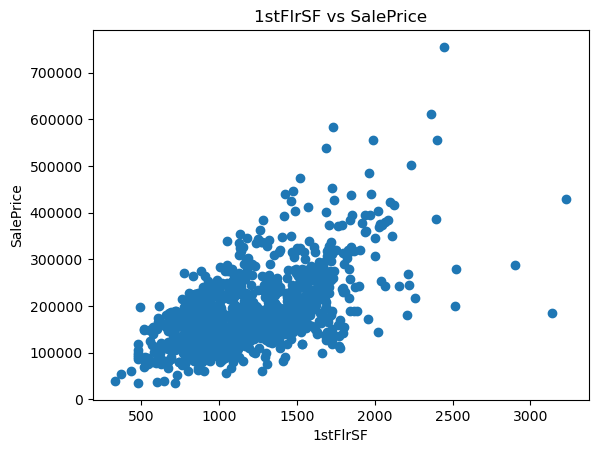

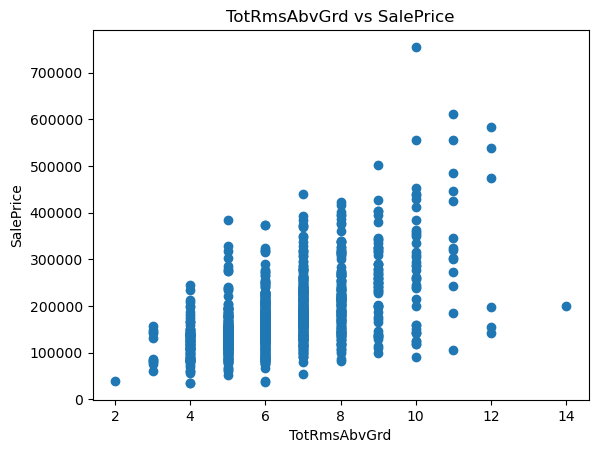

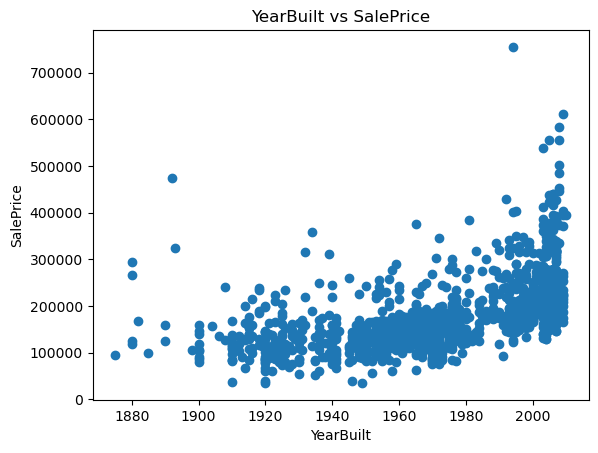

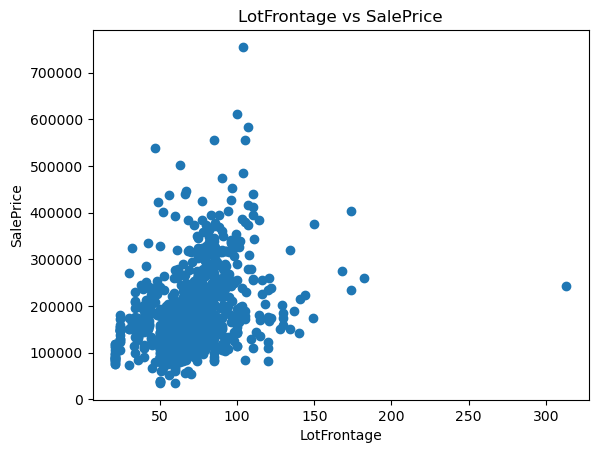

In [22]:
for column in data_entrenamiento.columns:
    if column != 'SalePrice':
        plt.scatter(data_entrenamiento[column], data_entrenamiento['SalePrice'])
        plt.xlabel(column)
        plt.ylabel('SalePrice')
        plt.title(f'{column} vs SalePrice')
        plt.show()

Los dos variables con mas potencia predictivo son OverallQual y 1stFlrSF